In [32]:
import os
import json
import pickle

import numpy as np

In [46]:

with open("../../pet_document_lengths.pickle", "rb") as file:
    training_document_lengths = pickle.load(file)
training_document_lengths

{'doc-1.1': 179,
 'doc-1.2': 113,
 'doc-1.3': 190,
 'doc-1.4': 243,
 'doc-10.1': 32,
 'doc-10.10': 116,
 'doc-10.11': 79,
 'doc-10.12': 55,
 'doc-10.13': 44,
 'doc-10.14': 127,
 'doc-10.2': 258,
 'doc-10.3': 143,
 'doc-10.4': 131,
 'doc-10.5': 47,
 'doc-10.6': 33,
 'doc-10.7': 76,
 'doc-10.8': 84,
 'doc-10.9': 91,
 'doc-2.1': 769,
 'doc-2.2': 714,
 'doc-3.1': 118,
 'doc-3.2': 87,
 'doc-3.3': 79,
 'doc-3.5': 174,
 'doc-3.6': 122,
 'doc-3.7': 96,
 'doc-3.8': 114,
 'doc-4.1': 735,
 'doc-5.1': 92,
 'doc-5.2': 92,
 'doc-5.3': 215,
 'doc-5.4': 271,
 'doc-6.1': 474,
 'doc-6.2': 66,
 'doc-6.3': 178,
 'doc-6.4': 214,
 'doc-7.1': 68,
 'doc-8.1': 53,
 'doc-8.2': 101,
 'doc-8.3': 97,
 'doc-9.1': 168,
 'doc-9.2': 105,
 'doc-9.3': 87,
 'doc-9.4': 109,
 'doc-9.5': 130}

In [45]:
data_path = "../../data/results/two-shot/5x5-relation"

data = []
for parent_folder in os.listdir(f"./{data_path}"):
    for child_folder in os.listdir(f"./{data_path}/{parent_folder}"):
        for file_name in os.listdir(f"./{data_path}/{parent_folder}/{child_folder}"):
            filepath = os.path.join(f"./{data_path}/{parent_folder}/{child_folder}", file_name)
            with open(filepath, "r") as file:
                json_data = json.load(file)
                data.append(json_data)

f1_scores_two_shot = [d["metrics"]["relation_metrics"]["overall"]["f1_score"] for d in data]
context_lengths = [training_document_lengths[str(d["examples_documents"][0])] + training_document_lengths[str(d["examples_documents"][1])] for d in data]

f1_score_and_context_length = []
for score, context_length in zip(f1_scores_two_shot, context_lengths):
    print(score, context_length)

0.05 411
0.0 411
0.02 411
0.05 411
0.0 411
0.02 411
0.04 411
0.0 411
0.03 411
0.0 310
0.0 310
0.0 310
0.06 310
0.0 310
0.01 310
0.09 310
0.01 310
0.04 310
0.0 158
0.17 158
0.04 158
0.27 158
0.0 158
0.17 158
0.05 158
0.13 158
0.06 158
0.0 246
0.06 246
0.07 246
0.0 246
0.06 246
0.17 246
0.0 246
0.23 246
0.0 246
0.05 913
0.0 913
0.08 913
0.01 913
0.04 913
0.04 913
0.0 913
0.12 913
0.0 913
0.75 165
0.5 165
0.24 165
0.06 165
0.0 165
0.01 165
0.22 165
0.03 165
0.0 165
0.07 150
0.31 150
0.39 150
0.29 150
0.27 150
0.01 150
0.09 150
0.04 150
0.04 150
0.02 150
0.25 150
0.12 150
0.32 150
0.03 150
0.0 150
0.03 150
0.05 150
0.0 150
0.03 150
0.06 150
0.24 150
0.05 150
0.04 150
0.1 150
0.0 150
0.16 150
0.0 150
0.43 119
0.15 119
0.85 119
0.0 119
0.03 119
0.0 119
0.24 119
0.03 119
0.0 119
0.22 243
0.21 243
0.05 243
0.05 243
0.0 243
0.0 243
0.04 243
0.08 243
0.0 243
0.04 243
0.06 243
0.19 243
0.13 243
0.14 243
0.0 243
0.06 243
0.0 243
0.0 243
0.04 319
0.25 319
0.47 319
0.38 319
0.01 319
0.08 319
0.0 319

In [35]:
import matplotlib.pyplot as plt

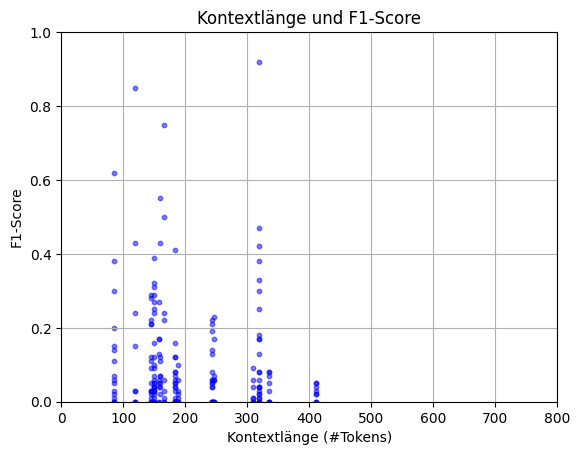

In [42]:
# plt.figure(figsize=(8,4))

plt.xlabel('Kontextlänge (#Tokens)')
plt.ylabel('F1-Score')
plt.title('Kontextlänge und F1-Score')

plt.grid(True)

plt.xlim(0, 800)
plt.ylim(0, 1)

plt.scatter(context_lengths, f1_scores_two_shot, s=10, alpha=0.5, c="blue")